In [2]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import gaussian_kde

In [11]:
table = Table.read('GMC_catalogue.ecsv', format='ascii.ecsv')
df = table.to_pandas()
print(df.head(10))

    GALAXY  CLOUDNUM   XCTR_DEG   YCTR_DEG    VCTR_KMS      RAD_PC     ECCEN  \
0  ngc0628         1  24.175169  15.769662  631.765805  115.006085  0.408406   
1  ngc0628         2  24.159191  15.766977  625.388109   98.827469  0.548266   
2  ngc0628         3  24.172344  15.768369  626.353067  118.827493  0.901545   
3  ngc0628         4  24.164555  15.760220  623.405527  119.517913  0.940323   
4  ngc0628         5  24.169554  15.762386  626.448014   99.588474  0.858404   
5  ngc0628         6  24.161491  15.767701  626.313976  107.921310  0.403272   
6  ngc0628         7  24.187398  15.747284  628.218002   57.596759  0.950726   
7  ngc0628         8  24.180651  15.750867  631.250967   58.147423  0.667055   
8  ngc0628         9  24.177633  15.753309  632.177503   93.365345  0.755161   
9  ngc0628        10  24.167087  15.757491  624.589386   64.448439  0.645092   

   SIGV_KMS  FLUX_KKMS_PC2     MLUM_MSUN     MVIR_MSUN  
0  7.593815  328514.607074  1.936410e+06  5.827943e+06  
1  7.

In [12]:
df.describe()

,CLOUDNUM,XCTR_DEG,YCTR_DEG,VCTR_KMS,RAD_PC,ECCEN,SIGV_KMS,FLUX_KKMS_PC2,MLUM_MSUN,MVIR_MSUN
count,5758.000000,5758.000000,5758.000000,5758.000000,5184.000000,5184.000000,5621.000000,5.758000e+03,5.758000e+03,5.129000e+03
mean,435.510247,162.898275,-6.693254,801.454151,67.941887,0.778521,6.008799,5.643645e+05,3.607848e+06,3.429737e+06
std,340.815129,57.223668,27.207371,227.229068,23.304149,0.176249,3.016247,9.075792e+05,5.003577e+06,4.437419e+06
min,1.000000,24.135404,-62.840035,142.507410,6.817168,0.019856,0.196746,3.511188e+03,2.829742e+04,1.422569e+03
25%,165.000000,143.054604,-32.808380,640.899163,51.968858,0.695261,4.060203,1.436143e+05,1.065736e+06,1.169530e+06
50%,355.000000,166.465202,-0.027069,744.386907,66.564659,0.824394,5.605058,3.082135e+05,2.146555e+06,2.258810e+06
75%,637.000000,170.077729,13.009668,968.257661,81.735657,0.907272,7.245304,6.459782e+05,4.273205e+06,3.927441e+06
max,1432.000000,259.299591,21.690434,1287.600735,245.472763,0.999939,26.848379,1.507109e+07,7.057661e+07,7.327408e+07


In [13]:
MCO_Mvir_group = df.groupby('GALAXY').agg({'MLUM_MSUN': 'mean', 'MVIR_MSUN': 'mean'})
print(MCO_Mvir_group)


            MLUM_MSUN     MVIR_MSUN
GALAXY                             
ngc0628  2.817329e+06  2.092842e+06
ngc1637  1.729325e+06  2.071854e+06
ngc2903  3.902322e+06  5.263166e+06
ngc3521  4.141644e+06  2.861519e+06
ngc3621  2.111776e+06  2.425354e+06
ngc3627  5.213530e+06  4.176494e+06
ngc4826  6.182155e+06  1.474709e+07
ngc5068  1.369563e+06  1.325697e+06
ngc5643  2.571373e+06  2.669681e+06
ngc6300  2.737088e+06  3.493979e+06


In [14]:
print(df.isnull().sum())

GALAXY             0
CLOUDNUM           0
XCTR_DEG           0
YCTR_DEG           0
VCTR_KMS           0
RAD_PC           574
ECCEN            574
SIGV_KMS         137
FLUX_KKMS_PC2      0
MLUM_MSUN          0
MVIR_MSUN        629
dtype: int64


In [15]:
#get number of GMCs in each galaxy
grouped = df.groupby('GALAXY')['CLOUDNUM']
cloud_count = grouped.count()
print(cloud_count)
print(np.sum(cloud_count))

GALAXY
ngc0628     472
ngc1637     275
ngc2903     810
ngc3521    1432
ngc3621     394
ngc3627    1048
ngc4826      48
ngc5068      74
ngc5643     695
ngc6300     510
Name: CLOUDNUM, dtype: int64
5758


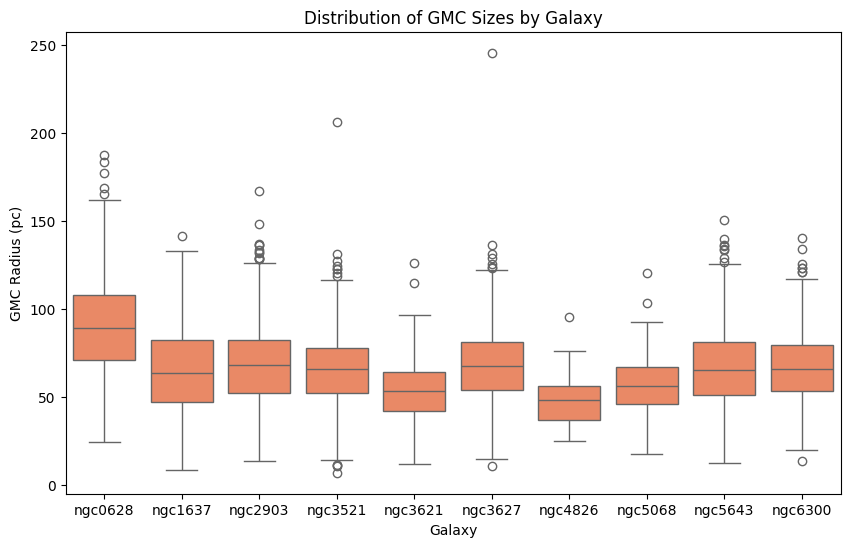

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GALAXY', y='RAD_PC', data=df, color='coral')
plt.title('Distribution of GMC Sizes by Galaxy')
plt.xlabel('Galaxy')
plt.ylabel('GMC Radius (pc)')
plt.savefig('BOXPLOT Distribution of GMC Sizes by Galaxy')
plt.show()

$$\sigma \propto R^{\beta} $$

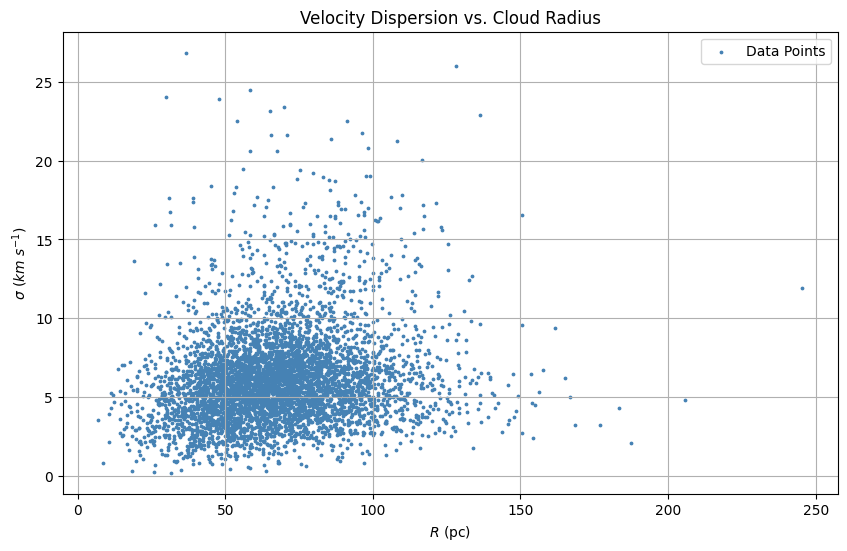

Slope: 0.28


In [17]:
# Larson's first law: Velocity dispersion is proportional to cloud size (R) 

df_clean = df.dropna(subset=['RAD_PC', 'SIGV_KMS'])

radius = df_clean['RAD_PC']
velocity_dispersion = df_clean['SIGV_KMS']

slope, intercept, r_value, p_value, std_err = linregress(np.log10(radius), np.log10(velocity_dispersion))

log_radius = np.log10(radius)
line = slope * log_radius + intercept

plt.figure(figsize=(10, 6))
plt.scatter(radius, velocity_dispersion, alpha=1, s=3, color='steelblue', label='Data Points')
plt.title('Velocity Dispersion vs. Cloud Radius')
plt.xlabel('$R$ (pc)')
plt.ylabel('$\\sigma$ ($km \\ s^{-1}$)')
plt.legend()
plt.grid(True)
plt.savefig('Larsons First Law')
plt.show()

print(f"Slope: {slope:.2f}")

/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/786021209.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_law_filtered_df = df_clean[(df['RAD_PC'] >= 34) & (df['RAD_PC'] <= 102) &
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/786021209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_law_filtered_df['log_RAD_PC'] = np.log10(first_law_filtered_df['RAD_PC'])
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/786021209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

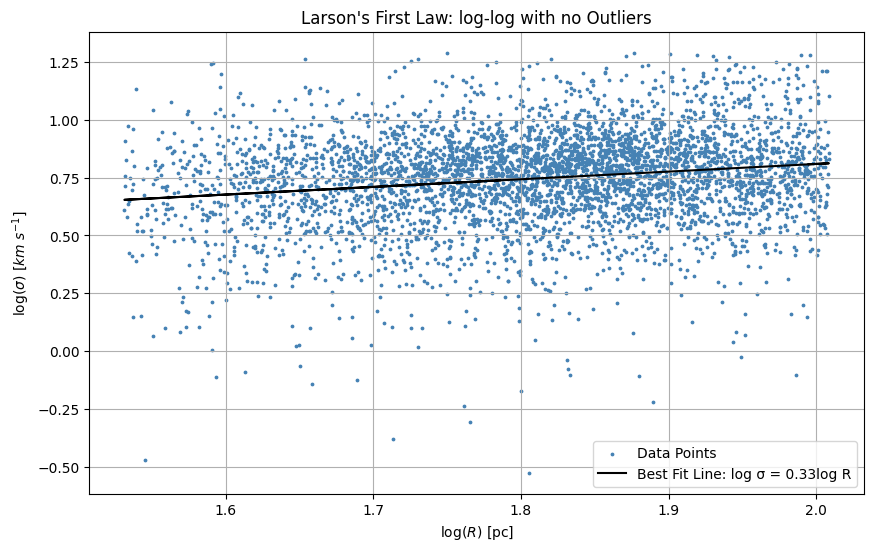

Slope: 0.33


In [20]:
first_law_filtered_df = df_clean[(df['RAD_PC'] >= 34) & (df['RAD_PC'] <= 102) & 
                 (df['SIGV_KMS'] >= 0) & (df['SIGV_KMS'] <= 20)]

first_law_filtered_df['log_RAD_PC'] = np.log10(first_law_filtered_df['RAD_PC'])
first_law_filtered_df['log_SIGV_KMS'] = np.log10(first_law_filtered_df['SIGV_KMS'])

slope, intercept, r_value, p_value, std_err = linregress(first_law_filtered_df['log_RAD_PC'], first_law_filtered_df['log_SIGV_KMS'])

log_radius = first_law_filtered_df['log_RAD_PC']
line = slope * log_radius + intercept

plt.figure(figsize=(10, 6))
plt.scatter(log_radius, first_law_filtered_df['log_SIGV_KMS'], alpha=1, s=3, color='steelblue', label='Data Points')
plt.plot(log_radius, line, 'black', label=f'Best Fit Line: log σ = {slope:.2f}log R')
plt.title('Larson\'s First Law: log-log with no Outliers')
plt.xlabel('log($R$) [pc]')
plt.ylabel('log($\\sigma$) [$km \\ s^{-1}$]')
plt.legend()
plt.grid(True)
plt.savefig('larsons first law clean and constrained')
plt.show()

print(f"Slope: {slope:.2f}")

<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/425306845.py:22: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('log(M) [$M_{\odot}$]')
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/425306845.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  second_law_filtered_df = df_clean[(df['RAD_PC'] >= 0) & (df['RAD_PC'] <= 200) &


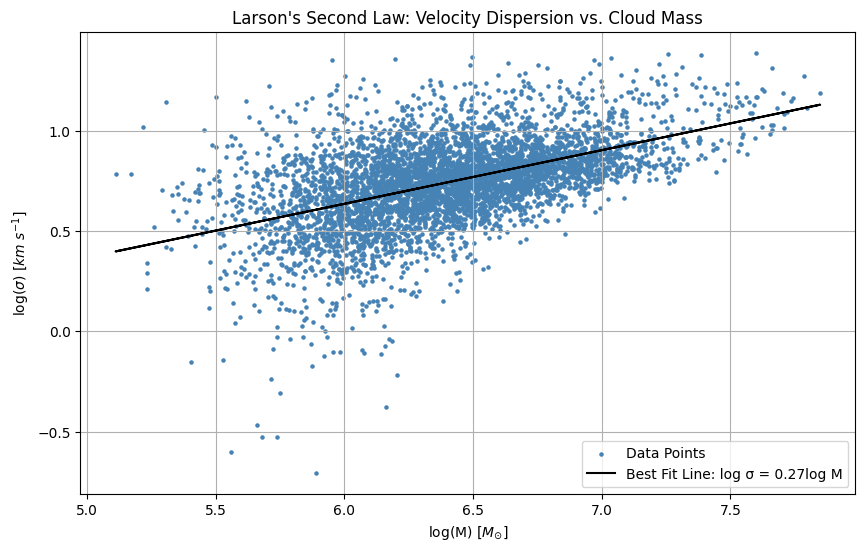

Slope: 0.27


In [21]:
# Larsons second law: Velocity dispersion is proportional to cloud mass 

# Ensure there are no zero or negative values in mass and velocity dispersion
second_law_filtered_df = df_clean[(df['RAD_PC'] >= 0) & (df['RAD_PC'] <= 200) & 
                 (df['SIGV_KMS'] >= 0) & (df['SIGV_KMS'] <= 25)]

second_law_filtered_df = second_law_filtered_df[(second_law_filtered_df['MLUM_MSUN'] > 0) & (second_law_filtered_df['SIGV_KMS'] > 0)]

# Apply log transformation
second_law_filtered_df['log_MLUM_MSUN'] = np.log10(second_law_filtered_df['MLUM_MSUN'])
second_law_filtered_df['log_SIGV_KMS'] = np.log10(second_law_filtered_df['SIGV_KMS'])

slope, intercept, r_value, p_value, std_err = linregress(second_law_filtered_df['log_MLUM_MSUN'], second_law_filtered_df['log_SIGV_KMS'])

log_mass = second_law_filtered_df['log_MLUM_MSUN']
line = slope * log_mass + intercept

plt.figure(figsize=(10, 6))
plt.scatter(log_mass, second_law_filtered_df['log_SIGV_KMS'], alpha=1, s=5, color='steelblue', label='Data Points')
plt.plot(log_mass, line, 'black', label=f'Best Fit Line: log σ = {slope:.2f}log M')
plt.title('Larson\'s Second Law: Velocity Dispersion vs. Cloud Mass')
plt.xlabel('log(M) [$M_{\odot}$]')
plt.ylabel('log($\\sigma$) [$km \\ s^{-1}$]')
plt.legend()
plt.grid(True)
plt.savefig('larsons second law loglog')
plt.show()

print(f"Slope: {slope:.2f}")

$$\rho = \frac{M}{4/3 \pi R^3}$$

$$\rho \propto R^{-\alpha}$$

This formula assumes that the clouds are roughly spherical, which is a common approximation in studies of GMCs.

$$\sigma \propto M^{0.20}$$

/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/4257568089.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  third_law_filtered_df = df_clean[(df['RAD_PC'] >= 34) & (df['RAD_PC'] <= 102)]
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/4257568089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_law_filtered_df['VOLUME_PC3'] = (4/3) * np.pi * (third_law_filtered_df['RAD_PC'] ** 3)
/var/folders/gh/qv4vgd4d1v743qvjdp80w1400000gn/T/ipykernel_59076/4257568089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

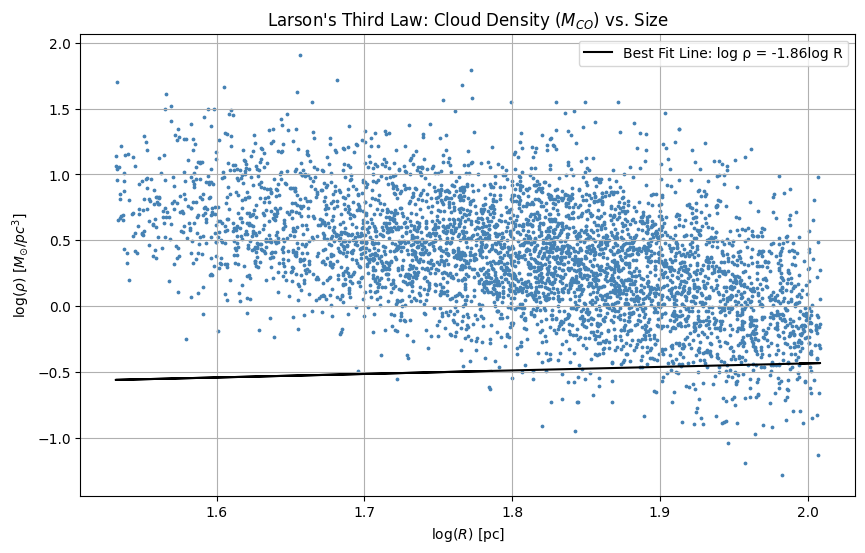

Slope: -1.86


In [22]:
### Larsons third law
df_clean = df.dropna(subset=['RAD_PC', 'MLUM_MSUN'])
third_law_filtered_df = df_clean[(df_clean['MLUM_MSUN'] > 0) & (df_clean['RAD_PC'] > 0)]
third_law_filtered_df = df_clean[(df['RAD_PC'] >= 34) & (df['RAD_PC'] <= 102)]
#(df['MLUM_MSUN'] >= 1e6) & (df['MLUM_MSUN'] <= 1e7)]

#volume in cubic parsecs
third_law_filtered_df['VOLUME_PC3'] = (4/3) * np.pi * (third_law_filtered_df['RAD_PC'] ** 3)

#density in solar masses per cubic parsec
third_law_filtered_df['DENSITY_MSUN_PC3'] = third_law_filtered_df['MLUM_MSUN'] / third_law_filtered_df['VOLUME_PC3']

#clean the data from zeros
third_law_filtered_df = third_law_filtered_df[(third_law_filtered_df['RAD_PC'] > 0) & (third_law_filtered_df['DENSITY_MSUN_PC3'] > 0)]

third_law_filtered_df['log_RAD_PC'] = np.log10(third_law_filtered_df['RAD_PC'])
third_law_filtered_df['log_DENSITY_MSUN_PC3'] = np.log10(third_law_filtered_df['DENSITY_MSUN_PC3'])


log_radius = third_law_filtered_df['log_RAD_PC']
line = slope * log_radius + intercept
slope, intercept, r_value, p_value, std_err = linregress(log_radius, third_law_filtered_df['log_DENSITY_MSUN_PC3'])

plt.figure(figsize=(10, 6))
plt.scatter(log_radius, third_law_filtered_df['log_DENSITY_MSUN_PC3'], alpha=1, s=3, color='steelblue')
plt.plot(log_radius, line, 'black', label=f'Best Fit Line: log ρ = {slope:.2f}log R')
plt.title('Larson\'s Third Law: Cloud Density ($M_{CO}$) vs. Size')
plt.xlabel('log($R$) [pc]')
plt.ylabel('log($\\rho$) [$M_{\\odot}/pc^3$]')
plt.legend()
plt.grid(True)
plt.savefig('larsons third law')
plt.show()

print(f"Slope: {slope:.2f}")

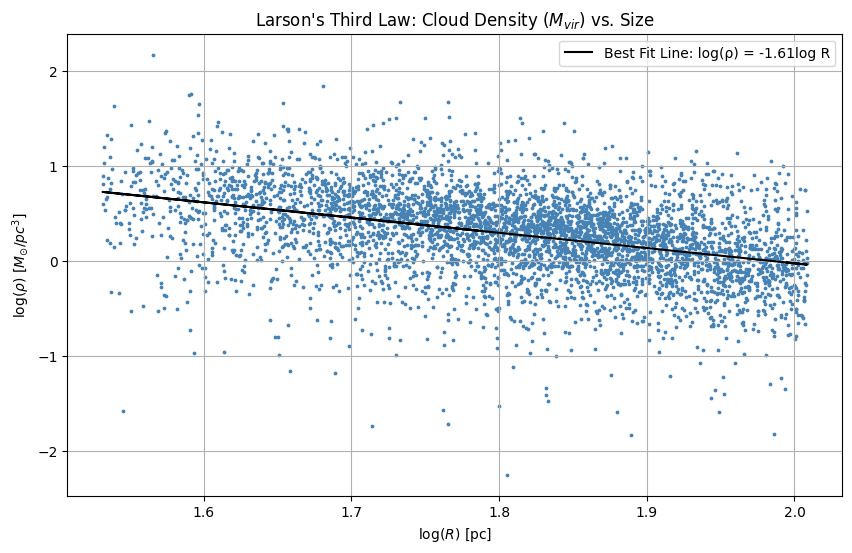

Slope: -1.61


In [23]:
### Larsons third law

#volume in cubic parsecs
third_law_filtered_df['VOLUME_PC3'] = (4/3) * np.pi * (third_law_filtered_df['RAD_PC'] ** 3)

#density in solar masses per cubic parsec
third_law_filtered_df['DENSITY_MSUN_PC3'] = third_law_filtered_df['MVIR_MSUN'] / third_law_filtered_df['VOLUME_PC3']

# Ensure there are no zero values for log transformation
third_law_filtered_df = third_law_filtered_df[(third_law_filtered_df['RAD_PC'] > 0) & (third_law_filtered_df['DENSITY_MSUN_PC3'] > 0)]

third_law_filtered_df['log_RAD_PC'] = np.log10(third_law_filtered_df['RAD_PC'])
third_law_filtered_df['log_DENSITY_MSUN_PC3'] = np.log10(third_law_filtered_df['DENSITY_MSUN_PC3'])

slope, intercept, r_value, p_value, std_err = linregress(third_law_filtered_df['log_RAD_PC'], third_law_filtered_df['log_DENSITY_MSUN_PC3'])
log_radius = third_law_filtered_df['log_RAD_PC']
line = slope * log_radius + intercept

plt.figure(figsize=(10, 6))
plt.scatter(log_radius, third_law_filtered_df['log_DENSITY_MSUN_PC3'], alpha=1, s=3, color='steelblue')
plt.plot(log_radius, line, 'black', label=f'Best Fit Line: log(ρ) = {slope:.2f}log R')
plt.title('Larson\'s Third Law: Cloud Density ($M_{vir}$) vs. Size')
plt.xlabel('log($R$) [pc]')
plt.ylabel('log($\\rho$) [$M_{\\odot}/pc^3$]')
plt.legend()
plt.grid(True)
plt.savefig('larsons third law Mvir')
plt.show()

print(f"Slope: {slope:.2f}")

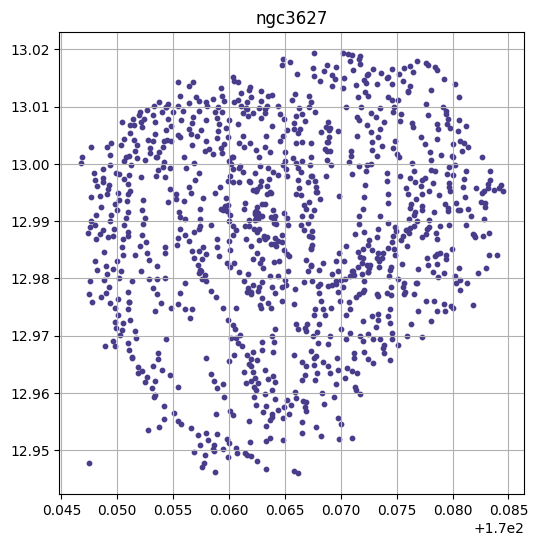

In [25]:
#galaxy plot
#sns.set_style("whitegrid")

gal = 'ngc3627'
gal_data = df[df['GALAXY'] == gal]

#extract coordinates
x = gal_data['XCTR_DEG']
y = gal_data['YCTR_DEG']


plt.figure(figsize=(6, 6))
sc = plt.scatter(x, y, s=10, color='darkslateblue')
#plt.colorbar(sc, label='Density of GMCs')
#plt.xlabel('Right Ascension (deg)')
#plt.ylabel('Declination (deg)')
#plt.xscale('log')
#plt.yscale('log')
plt.title(f'{gal}')
plt.grid(True)
plt.savefig(gal)
plt.show()